<a href="https://colab.research.google.com/github/VokeBrume/ArtificialIntelligence/blob/main/ML/CNNForHeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK (CNN) FOR HEART DISEASE PREDICTION** 
by Voke Brume

## **INTRODUCTION**

Several factors (known as risk factors) such as general health conditions, lifestyle, age, and family history can increase an individual's risk for heart disease. According to the CDC, about 47% of Americans have at least one of three key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status,  obesity (high BMI), lack of sufficient physical activity, hypertension, or high alcohol intake.


Ahmed. et al. (2017) show that Body Mass Index (BMI) and systolic blood pressure are the two most critical factors affecting hypertension. 
High blood pressure (also called "silent killer") is a medical condition that happens when the blood pressure in your arteries and other blood vessels is too high. High blood pressure can be lowered with lifestyle changes or medicine to reduce the risk of heart disease and heart attack.

Cholesterol is a fat-like substance made by the liver or found in certain foods. When more cholesterol than the body can use is taken, the extra cholesterol can build up in the artery's walls, including those of the heart. This leads to narrowing the arteries and can decrease the blood flow to the heart, brain, kidneys, and other parts of the body. There are two main types of blood cholesterol: Low-density Lipoprotein (LDL), which is considered to be "bad" cholesterol because it can cause plaque buildup in your arteries, and High-density Lipoprotein) (HDL) cholesterol, which is considered "good" cholesterol because higher levels provide some protection against heart disease.

The human body needs glucose for energy. A hormone called insulin moves this glucose from the food we eat to our body's cells for energy. Diabetes is when the body does not make enough insulin, causing sugar to build up in the blood. Adults with diabetes have a higher risk of death than adults who do not have diabetes. 

Obesity is excess body fat linked to higher "bad" cholesterol and triglyceride levels and lower "good" cholesterol levels. Obesity can lead to high blood pressure and diabetes, and heart disease.

##### **GOAL** 

While most of the existing machine learning models used on similar datasets are vulnerable to class imbalance, even after adjusting class-specific weights, a simple two-layer CNN exhibits resilience to the imbalance with fair harmony in class-specific performance (Dutta et al., 2020).

This project implements Dutta et al.'s convolutional neural network approach to the CDC's Behavioral Risk Factor Surveillance System (BRFSS) 2020 dataset to predict heart disease in a person. This process is known as Transfer Learning, which is a machine learning method where a model developed for a task is used as the starting point for a model on a second task.

## **DATA**

### **CDC DATASET**

The BRFSS is a system of ongoing health-related telephone surveys initiated in 1984 to collect uniform state-specific data on health risk behaviors, chronic diseases and conditions, access to health care, and preventive health services related to the leading causes of death and disability in the United States.

Since 2011, the BRFSS has conducted both landline telephone-and cellular telephone-based surveys. All the responses were self-reported; the BRFSS does not conduct proxy interviews. In conducting the landline telephone survey, interviewers collect data from a randomly selected adult in a household. In conducting the cellular telephone survey, interviewers collect data from adults answering the cellular telephones residing in a private residence or college housing. In 2014, all adults contacted through their cellular telephone were eligible, regardless of their landline phone use (i.e., complete overlap).

In 2020, an optional module was included to measure several childhood health and wellness indicators, including asthma prevalence for people aged 17 years or younger. BRFSS respondents are identified through telephone-based methods. According to the 2019 American Community Survey (ACS), 99% of all occupied housing units in the United States had telephone service available, and telephone non-coverage ranged from less than 1.0% in several states to 1.6% in South Dakota. It is estimated that 3.5% of occupied households in Puerto Rico did not have telephone service. The increasing percentage of households abandoning their landline telephones for cellular telephones has significantly eroded the population coverage provided by landline telephone-based surveys to pre-1970s levels. The preliminary results (January to June 2020) from the National Health Interview Survey (NHIS) indicate that 61.8% of adults were wireless-only.3 Using a dual-frame survey including landline and cellular telephones improved the validity, data quality, and representativeness of BRFSS data.

Each year, the states—represented by their BRFSS coordinators and CDC—agree on the questionnaire's content. The questionnaire consists of three parts:

- Core component (a standard set of questions that all states use.
- Optional BRFSS Modules (set of questions on specific questions)
- State-added questions (Questions added by individual states)

**Sample Description**

In the sample design, states begin with a single stratum. However, many states sample disproportionately from strata that correspond to sub-state regions to provide adequate sample sizes for smaller geographically defined populations of interest. In 2020, the 47 states with geographic stratification were Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Pennsylvania, Puerto Rico, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, and Wisconsin. As a precaution to protect the confidential responses provided by the respondent, specific variables (such as sub-state geographic identifiers, detailed race or ethnicity, and older than 80 years of age) in a given year were removed. (BRFSS 2020)


**Data Collection**

In 2020, 53 states or territories used Computer-Assisted Telephone Interview (CATI) systems. CDC supports CATI programming using the Ci3 WinCATI software package. This support includes programming the core and module questions for data collectors, providing questionnaire scripting of state-added questions for states requiring such assistance, and contracting with a Ci3 consultant to assist states. Following the BRFSS, state health personnel or contractors conduct interviews. The core portion of the questionnaire lasts an average of 17 minutes. Interview time for modules and state-added questions depends on the number of questions used, but generally, they add 5 to 10 minutes to the interview. (BRFSS 2020)

For more information on CDC data collection and processing, see reference.

### **REPORT DATASET**

This report dataset comes from the CDC BRFSS dataset. Variables deemed most relevant to directly or indirectly influence heart disease were kept, while other variables were dropped. Other undisclosed cleaning procedures to make the dataset usable for machine learning projects were also applied to the dataset. This shrunk the CDC dataset down from about 401,958 records and over 300 variables to the report dataset. Examples of shrunk data include the removal of responses from individuals aged 18 - 24 because there is little to no threat of heart disease and multiple variables such as "Do you have serious difficulty walking or climbing stairs?"

In [1]:
# Import needed libraries
import os
import copy
import urllib.request

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
# Read the file
file = "/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS677/report/heart_2020_cleaned.xlsx"
heart_disease = pd.read_excel(file)

In [3]:
# View the first five samples in the dataset
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


The above table show that the dataset has one (1) dichotomous dependent variable named "HeartDisease" and seventeen variables that can be used to predict it. The exhaustive list of variables is BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, and SkinCancer.

COLUMN CODES
- HeartDisease: Respondents who have ever reported coronary heart disease (CHD) or myocardial infarction (MI).
- BMI: Body Mass Index (BMI).
- Smoking: "Have you smoked at least 100 cigarettes in your entire life?"
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than seven drinks per week
- Stroke: (Ever told) (you had) a stroke?
- PhysicalHealth: "Now, thinking about your physical health, including physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)."
- MentalHealth: "Thinking about your mental health, how many days during the past 30 days were your mental health not good? (0-30 days)."
- DiffWalking: "Do you have serious difficulty walking or climbing stairs?"
- Sex: "Are you male or female?"
- AgeCategory: Fourteen-level age category. (then calculated the mean)
- Race: Imputed race/ethnicity value.
- Diabetic: "Ever told you had diabetes?"
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- GenHealth: "Would you say that, in general, your health is Very good, Good, Excellent, Fair, or Poor?"
- SleepTime: "On average, how many hours of sleep do you get in 24 hours?"
- Asthma: "Ever told you had asthma?"
- KidneyDisease: "Not including kidney stones, bladder infection, or incontinence, were you ever told you had kidney disease?"
- SkinCancer: "Ever told you had skin cancer?"

### **DATA EXPLORATION AND VISUALIZATION**



In [4]:
# The info() function is used to get a quick description of the data and the number of null values.
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

The above figure shows that the dataset contains 319795 samples. Also, all attributes contain all 319795 non-null values, meaning that all null values have been treated. Furthermore, the variables in the dataset are a mixture of numerical values and objects (string data type in this dataset). The objects were examined to understand the nature of the dataset better.

In [5]:
# Show categories and their respective counts

# List of all object type variables in the dataset
object_variables = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Loop to visualize counts of object type variables
for obj_var in object_variables:
    print(heart_disease[obj_var].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Female    167805
Male      151990
Name: Sex, dtype: int64
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
No                         269653
Yes                         40802
No

The above counts show that the values of the objects are repetitive, meaning they are most likely categorical. They will be considered categorical for subsequent processing in this report. It also shows what categories exist and how many districts belong to each category. A pivotal piece of information to observe is the enormous disparity between the number of respondents diagnosed with heart disease and those that have not (No = 292422 vs. Yes = 27373). The preprocessing phase addresses this imbalance.

In [6]:
# Show a summary of the numerical attributes
heart_disease.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


The above figure shows common statistical characteristics of the numerical variables in the dataset.
- std: This row shows the standard deviation, which measures how dispersed the values are.
- 25%, 50%, 75% (1st quartile, median, third quartile): Showing the corresponding percentiles, which indicates the values below which a given percentage of observations fall in a group of observations.

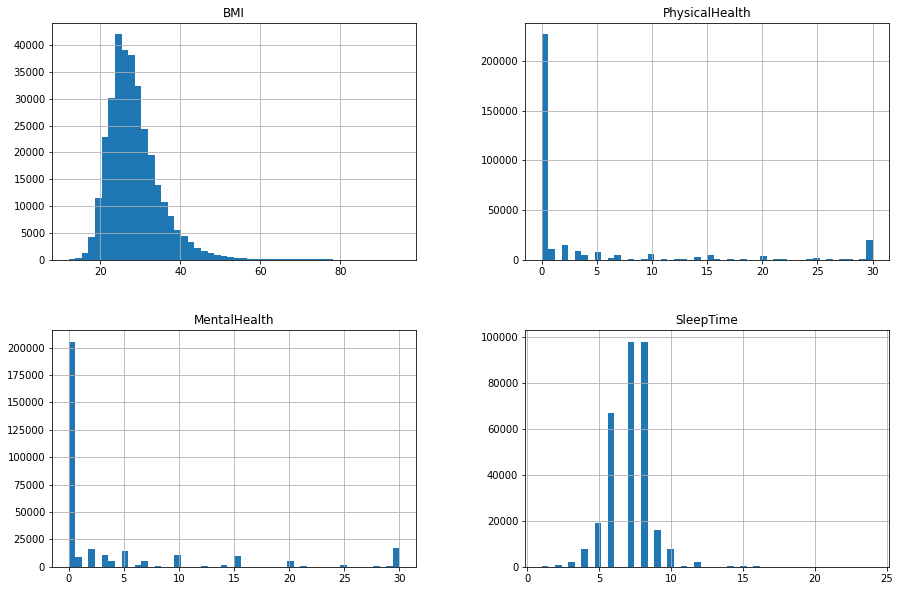

In [7]:
# Histogram plot of each numerical variable in the dataset
heart_disease.hist(bins=50, figsize=(15,10))
plt.show()

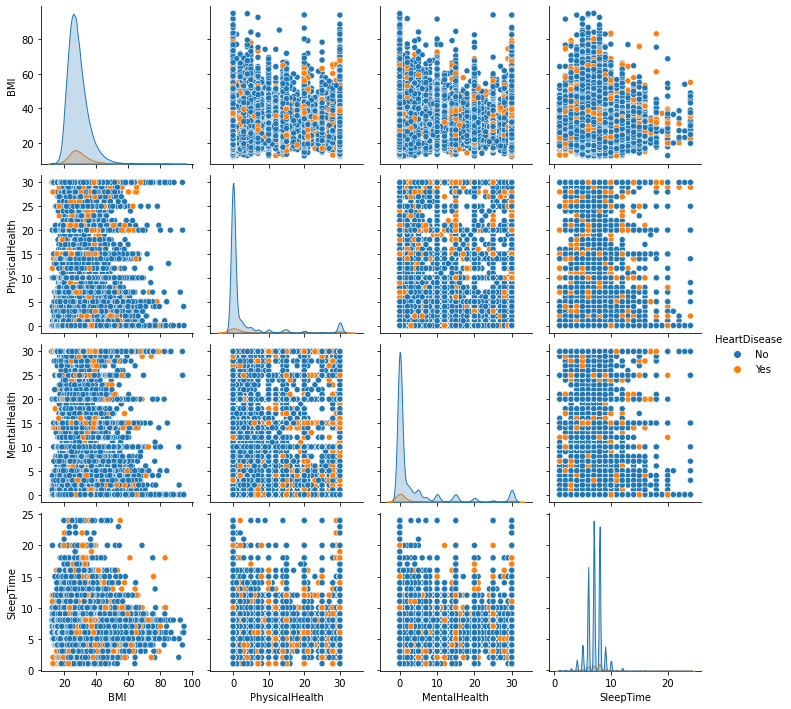

In [8]:
# Pairplot of all numerical columns 
sns.pairplot(heart_disease, hue= 'HeartDisease');

The above plots show the distribution of the numeric variables in the dataset. All values are continuous and appear as is, but most have different units. "PhysicalHealth" and "MentalHealth" are expressed in terms of days, while "SleepTime" is expressed in terms of hours. The variables have different scales, with "BMI" appearing skewed to the left, "PhysicalHealth" and "MentalHealth" appearing skewed to the left with a few outliers, and "SleepTime" distributed normally between about 0 - 12 days. A strong relationship can also be observed in the distribution of "PhysicalHealth" and "MentalHealth."

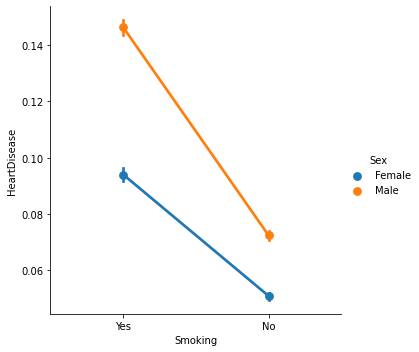

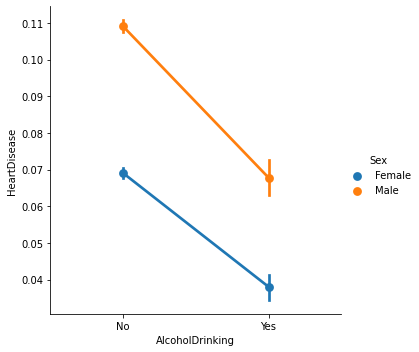

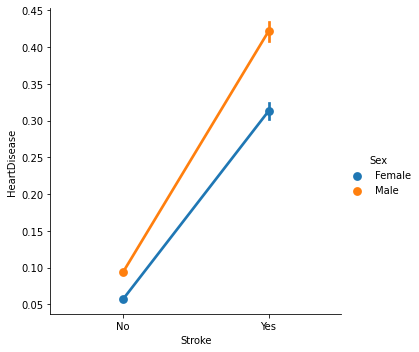

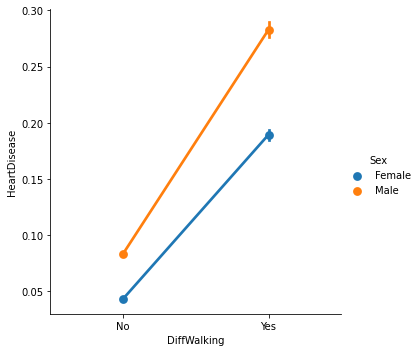

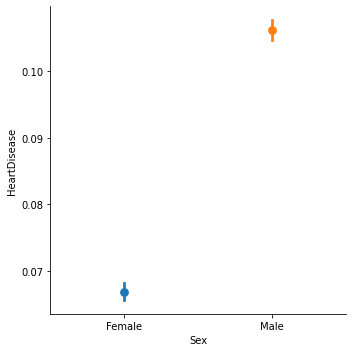

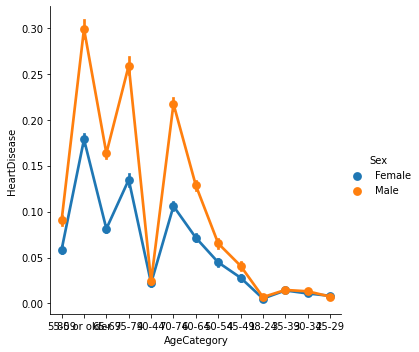

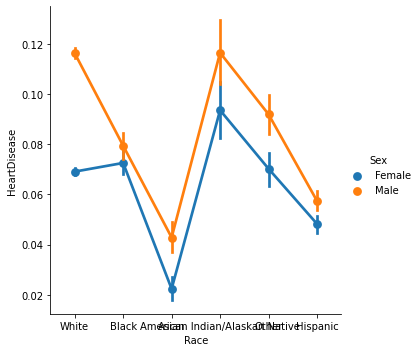

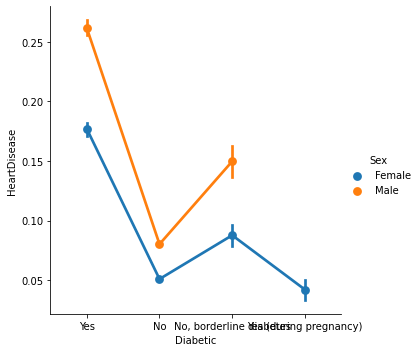

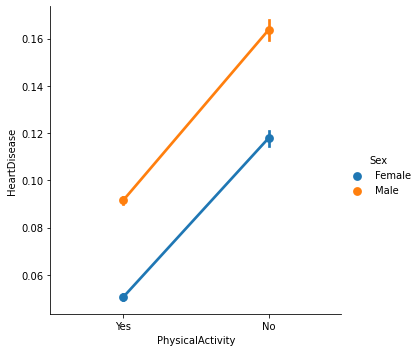

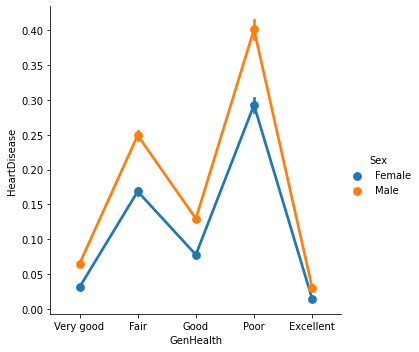

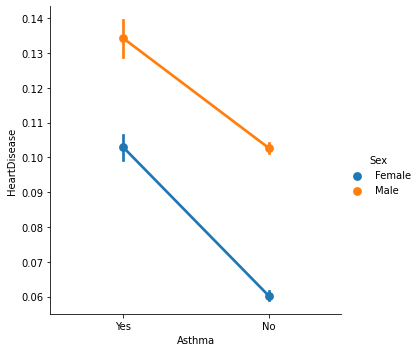

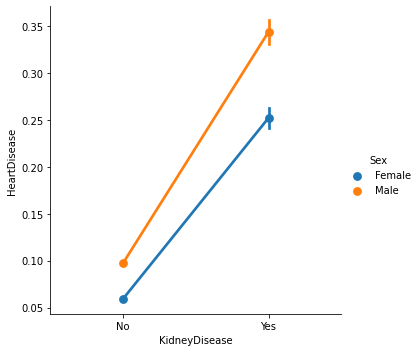

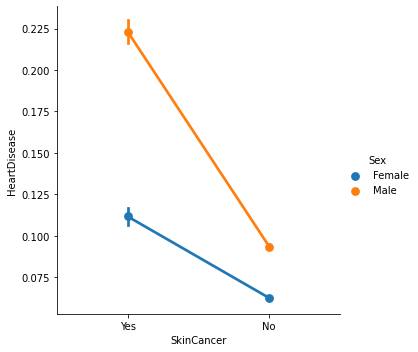

In [9]:
# Plot each categorical columns against the heart disease column(label)
from sklearn.preprocessing import LabelEncoder
heart_disease_excopy = heart_disease.copy()
lab_encd = LabelEncoder()
lab_encd.fit(heart_disease_excopy['HeartDisease'])
heart_disease_excopy['HeartDisease'] = lab_encd.transform(heart_disease_excopy['HeartDisease'])
cat = [col for col in heart_disease_excopy.columns if heart_disease_excopy[col].dtypes == 'object']
for i in cat:
    sns.catplot(y = 'HeartDisease',x = i,hue = 'Sex',data = heart_disease_excopy,kind = 'point')

The above charts suggest the following:
- There is more male suffering from heart disease than female
- Smokers are more liable to suffer from heart disease than non-smokers
- Respondents diagnosed with stroke and difficulty walking are more liable to have heart disease the not
- High alcohol intake can also be a good indicator of heart disease
- Diabetes and general health are good indicators of heart disease in both male and female

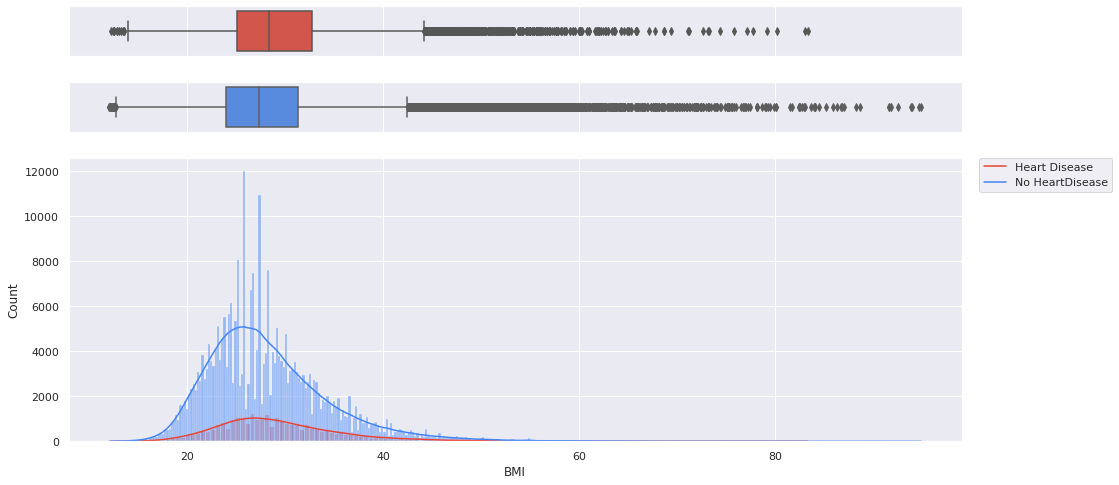

In [10]:
# Understanding the relationship between BMI and Heart Disease
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=heart_disease[heart_disease['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(heart_disease[heart_disease['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=heart_disease[heart_disease['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(heart_disease[heart_disease['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

The above chart suggests that respondents with Heart Disease have a higher BMI than people with no Heart Disease.

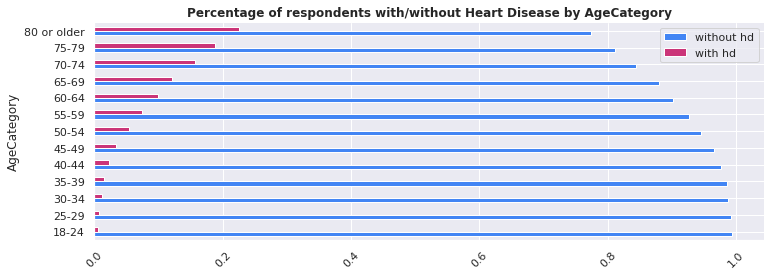

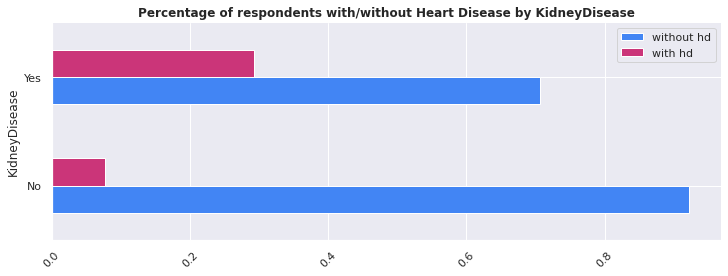

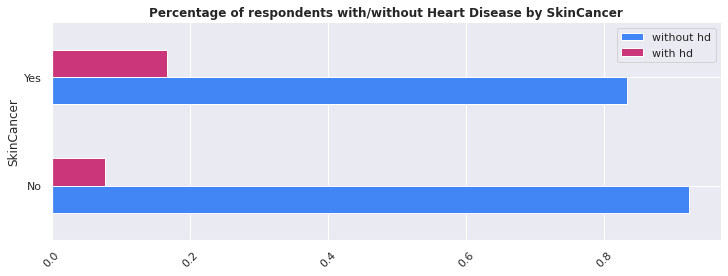

In [11]:
# Plot Heart Disease of respondents against any column by adding it to list
cat_cols = ['AgeCategory', 'KidneyDisease', 'SkinCancer']

for i in range(0, len(cat_cols)):
    crosstb = pd.crosstab(heart_disease[cat_cols[i]], heart_disease.HeartDisease)
    crosstb['without_hd_percent'] = crosstb['No'] / (crosstb['No'] + crosstb['Yes'])
    crosstb['with_hd_percent'] = crosstb['Yes'] / (crosstb['No'] + crosstb['Yes'])
    
    crosstb = crosstb.drop(['Yes', 'No'], axis = 1)
    
    crosstb.plot(kind='barh', color=["#4285f4", "#CB3579"])
    sns.despine()
    labels = ["without hd","with hd"]
    plt.gcf().set_size_inches(12, 4)
    plt.xticks(rotation = 45)
    plt.legend(labels=labels)
    plt.title("Percentage of respondents with/without Heart Disease by " + cat_cols[i], fontweight='bold')
    plt.show()

The above charts suggest the following:
- There is a strong relationship between age and heart disease. The older, the more susceptible an individual is to heart diseases.
- Mostly, older respondents are found to have heart disease, skin cancer & kidney disease

Percentage of Male to have Heart disease: 11
Percentage of Female to have Heart disease: 7


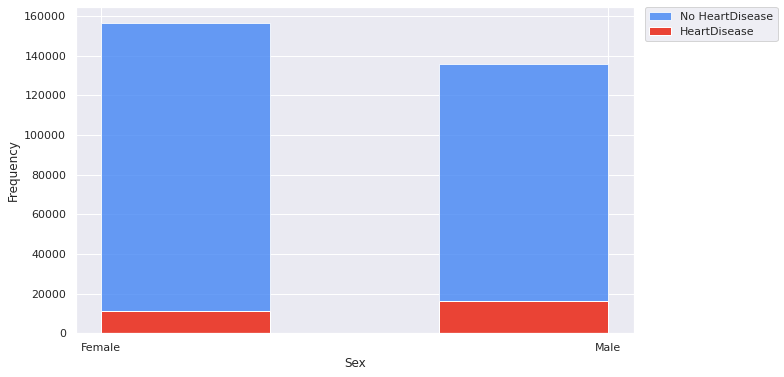

In [12]:
# Plot the number of male and female the are Non-HD vs HD
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

female_with_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Sex']=='Female')])
num_female = len(heart_disease[heart_disease['Sex']=='Female'])
male_with_heart_disease = len(heart_disease[(heart_disease['HeartDisease']=='Yes') & (heart_disease['Sex']=='Male')])
num_male = len(heart_disease[heart_disease['Sex']=='Male'])
print('Percentage of Male to have Heart disease:', round((male_with_heart_disease/num_male) * 100))
print('Percentage of Female to have Heart disease:', round((female_with_heart_disease/num_female) * 100))

The above chart suggests that although more female respondents were involved in the survey, males are more likely to have heart disease.

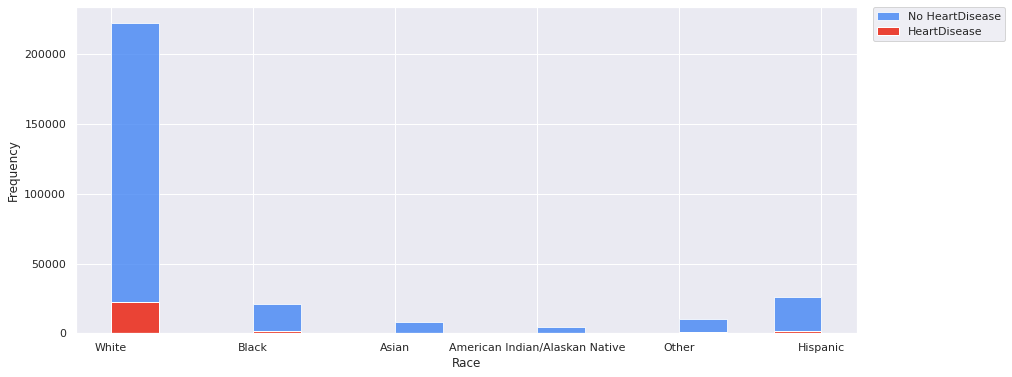

In [13]:
# Plot the different races against Non-HD vs HD
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(heart_disease[heart_disease["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease[heart_disease["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

The above chart shows that according to the percentage of races represented by the data, White people are more likely to be diagnosed with heart disease. 

### **DATA PREPROCESSING**

**Handling Text and Categorical Attributes:** Most machine learning algorithms prefer numerical to alphabetical values. Therefore, the categories will be converted from text to numbers.

In [14]:
# A copy of the data was created before manipulation
heart_disease_copy = heart_disease.copy()
heart_disease_copy

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [15]:
# Oversampling of samples with heart diseases to balance data
heart_disease_copy
class_0 = heart_disease_copy[heart_disease_copy['HeartDisease'] == 'No']
class_1 = heart_disease_copy[heart_disease_copy['HeartDisease'] == 'Yes']

class_1 = class_1.sample(len(class_0),replace=True)
heart_disease_copy = pd.concat([class_0, class_1], axis=0)
heart_disease_copy

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283609,Yes,33.00,No,No,No,0,1,No,Female,55-59,Black,Yes,Yes,Good,7,No,No,No
306947,Yes,20.37,Yes,No,No,0,0,No,Female,75-79,White,Yes,Yes,Good,6,No,No,No
86037,Yes,35.62,No,Yes,No,0,5,No,Male,40-44,White,No,Yes,Very good,6,No,No,No
46973,Yes,23.03,Yes,No,No,2,0,No,Female,60-64,White,Yes,Yes,Good,6,No,No,No


The mean age for each age category replaces age values.

In [16]:
# Calculate median age to represent each age category, making them continuous feature
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
heart_disease_copy['AgeCategory'] = heart_disease_copy['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
heart_disease_copy['AgeCategory'] = heart_disease_copy['AgeCategory'].astype('float')

Binary values were then used to represent a respondents response to having heart disease or not.

In [17]:
# Dictionary for binary values to the HeartDisease column
cleanup_nums = {"HeartDisease":     {"No": 0, "Yes": 1}}

In [18]:
# Convert the column values to numbers using replace
heart_disease_copy = heart_disease_copy.replace(cleanup_nums)
heart_disease_copy

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,57.0,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80.0,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,67.0,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,77.0,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,42.0,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283609,1,33.00,No,No,No,0,1,No,Female,57.0,Black,Yes,Yes,Good,7,No,No,No
306947,1,20.37,Yes,No,No,0,0,No,Female,77.0,White,Yes,Yes,Good,6,No,No,No
86037,1,35.62,No,Yes,No,0,5,No,Male,42.0,White,No,Yes,Very good,6,No,No,No
46973,1,23.03,Yes,No,No,2,0,No,Female,62.0,White,Yes,Yes,Good,6,No,No,No


The label is saved to a variable and dropped from the dataset

In [19]:
# Get dataset label
hp_label = np.array(heart_disease_copy['HeartDisease'])
hp_label

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
# Create a temporary copy to use for the confusion matrix
temp_heart_disease_copy = heart_disease_copy.copy()

In [21]:
# Drop the label column
heart_disease_copy.drop(['HeartDisease'], axis = 1, inplace=True)
heart_disease_copy

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3,30,No,Female,57.0,White,Yes,Yes,Very good,5,Yes,No,Yes
1,20.34,No,No,Yes,0,0,No,Female,80.0,White,No,Yes,Very good,7,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,67.0,White,Yes,Yes,Fair,8,Yes,No,No
3,24.21,No,No,No,0,0,No,Female,77.0,White,No,No,Good,6,No,No,Yes
4,23.71,No,No,No,28,0,Yes,Female,42.0,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283609,33.00,No,No,No,0,1,No,Female,57.0,Black,Yes,Yes,Good,7,No,No,No
306947,20.37,Yes,No,No,0,0,No,Female,77.0,White,Yes,Yes,Good,6,No,No,No
86037,35.62,No,Yes,No,0,5,No,Male,42.0,White,No,Yes,Very good,6,No,No,No
46973,23.03,Yes,No,No,2,0,No,Female,62.0,White,Yes,Yes,Good,6,No,No,No


Using numbers to represent the categorical values will lead to misrepresentation by machine learning (ML) algorithms. An example is the 'Race' variable, where ML algorithms may interpret "American Indian/Alaskan Native" (4) as being four times a race as "White" (1). Hence, the use of One-hot Encoding to ensure values are not weighted incorrectly.

In [22]:
# Dummy variable for categorical variables using one-hot-coding
heart_disease_copy = pd.get_dummies(heart_disease_copy,columns=["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "AgeCategory", "Diabetic", "PhysicalActivity", "GenHealth", "KidneyDisease", 'MentalHealth', 'Asthma', 'SleepTime', 'Race', 'Sex', 'SkinCancer']) 

varb = np.array(heart_disease_copy.columns)
heart_disease_copy = np.array(heart_disease_copy)
heart_disease_copy = pd.DataFrame(heart_disease_copy, columns=varb)
heart_disease_copy

,BMI,PhysicalHealth,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Sex_Female,Sex_Male,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,26.58,20.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,24.21,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,23.71,28.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,33.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
584840,20.37,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
584841,35.62,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
584842,23.03,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Below is a correlation plot to visualize the correlation between the variables.

In [23]:
import plotly.express as px

# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if temp_heart_disease_copy[col].dtype == 'O':
        le = LabelEncoder()
        temp_heart_disease_copy[col] = le.fit_transform(temp_heart_disease_copy[col])

# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(temp_heart_disease_copy, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

fig = px.imshow(temp_heart_disease_copy[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=900)
fig.show()

The above plot shows that "PhysicalActivity" and "DiffWalking" have the highest correlation value of 0.4, which is a small coefficient considering the size of the dataset. Generally, the features in the dataset do not have high correlation values.

The data is normalized, so the values appear similar across all records and fields. This increases the cohesion of entry types leading to cleansing, lead generation, segmentation, and higher quality data.

The data is finally converted to a NumPy array in preparation for feeding the data to a machine learning model.

In [24]:
# Convert data from pandas DataFrame to numpy array
heart_disease_copy = np.array(heart_disease_copy)

In [25]:
# Print column names to verify and check number of samples with and without Heart Disease
print(heart_disease_copy.shape)
print(varb)
print(len(hp_label[hp_label==0]))
print(len(hp_label[hp_label==1]))
heart_disease_copy

(584844, 103)
['BMI' 'PhysicalHealth' 'Smoking_No' 'Smoking_Yes' 'AlcoholDrinking_No'
 'AlcoholDrinking_Yes' 'Stroke_No' 'Stroke_Yes' 'DiffWalking_No'
 'DiffWalking_Yes' 'AgeCategory_21.0' 'AgeCategory_27.0'
 'AgeCategory_32.0' 'AgeCategory_37.0' 'AgeCategory_42.0'
 'AgeCategory_47.0' 'AgeCategory_52.0' 'AgeCategory_57.0'
 'AgeCategory_62.0' 'AgeCategory_67.0' 'AgeCategory_72.0'
 'AgeCategory_77.0' 'AgeCategory_80.0' 'Diabetic_No'
 'Diabetic_No, borderline diabetes' 'Diabetic_Yes'
 'Diabetic_Yes (during pregnancy)' 'PhysicalActivity_No'
 'PhysicalActivity_Yes' 'GenHealth_Excellent' 'GenHealth_Fair'
 'GenHealth_Good' 'GenHealth_Poor' 'GenHealth_Very good'
 'KidneyDisease_No' 'KidneyDisease_Yes' 'MentalHealth_0' 'MentalHealth_1'
 'MentalHealth_2' 'MentalHealth_3' 'MentalHealth_4' 'MentalHealth_5'
 'MentalHealth_6' 'MentalHealth_7' 'MentalHealth_8' 'MentalHealth_9'
 'MentalHealth_10' 'MentalHealth_11' 'MentalHealth_12' 'MentalHealth_13'
 'MentalHealth_14' 'MentalHealth_15' 'MentalHealth_1

array([[16.6 ,  3.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [26.58, 20.  ,  0.  , ...,  1.  ,  1.  ,  0.  ],
       ...,
       [35.62,  0.  ,  1.  , ...,  1.  ,  1.  ,  0.  ],
       [23.03,  2.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [28.13, 30.  ,  1.  , ...,  1.  ,  1.  ,  0.  ]])

## **PROJECT ARCHITECTURE**

**LASSO & Majority Voting (Feature Nomination) --> Data Reduction & Normalization --> Convolutional Neural Network (CNN)**

### **FEATURE NOMINATION USING LEAST ABSOLUTE SHRINKAGE AND SELECTOR OPERATOR (LASSO)**

The goal of the LASSO technique is variable selection and regularization. It is a technique that shrinks data values in a dataset toward a central point, thereby aiding variable selection and parameter elimination. In this process, a penalty equal to the absolute value of the magnitude of coefficients is applied to the data, thereby shrinking some coefficients to zero and eliminating them from the model.

A limitation of using LASSO is its tendency to arrive at misleading results in cases of data imbalance, thereby causing incorrect selection of essential variables if LASSO is performed on the entire dataset. The dataset is randomly sampled, and LASSO is iterated a hundred times (100) to mitigate this limitation. Majority voting is then used to identify variables that are non-zero in most of the iterations.

In [26]:
# Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression

# Majority voting
featureVote = np.zeros(heart_disease_copy.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(hp_label==0)[0]   # no heart disease
    label1_indx = np.where(hp_label==1)[0]   # heart disease 
    numTrainData0 = 1300
    numTrainData1 = 1300
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)
    
    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]
    
    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)    
    trainData  =  heart_disease_copy[trainIndx]
    trainLabel =  hp_label[trainIndx]
    testData   =  heart_disease_copy[testIndx]
    testLabel  =  hp_label[testIndx]    
    
    # Data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)
    
    # Elastic net and Lasso from scikit
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)    
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1


(103,)


Below is the result of the majority voting.

In [27]:
# Print result of majority voting
print(featureVote)
print(iter)

[ 61.  88. 100.  61.  70.  53. 100.  64.  99.  66. 100. 100. 100. 100.
 100. 100.  84.  14.  73.  99. 100. 100. 100.  78.   8.  93.  38.  46.
  26. 100. 100.   0. 100. 100.  99.  70.  26.  52.  46.  36.  44.  39.
  40.  43.  38.  40.  39.  40.  29.  23.  50.  30.  25.  22.  34.   8.
  50.  38.  24.  24.  13.  41.  21.  20.  34.  33.  54.  94.  63.  47.
  47.  59.  72.  48.  38.  59.  27.  44.  47.  45.  44.  26.  46.  34.
  48.  12.  35.   0.  29.   1.  13.   1.  26.  47.  57.  59.  36.  37.
  41. 100.  52.  87.  56.]
<built-in function iter>


Below is the feature nomination process via LASSO

In [28]:
# Feature nomination via Lasso (from feature 1 to 30) including dummy variables
thresH = 0
featureIndx = np.where(featureVote[0:30]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(30,heart_disease_copy.shape[1]))
print(varb[featureIndx])

['BMI' 'PhysicalHealth' 'Smoking_No' 'Smoking_Yes' 'AlcoholDrinking_No'
 'AlcoholDrinking_Yes' 'Stroke_No' 'Stroke_Yes' 'DiffWalking_No'
 'DiffWalking_Yes' 'AgeCategory_21.0' 'AgeCategory_27.0'
 'AgeCategory_32.0' 'AgeCategory_37.0' 'AgeCategory_42.0'
 'AgeCategory_47.0' 'AgeCategory_52.0' 'AgeCategory_57.0'
 'AgeCategory_62.0' 'AgeCategory_67.0' 'AgeCategory_72.0'
 'AgeCategory_77.0' 'AgeCategory_80.0' 'Diabetic_No'
 'Diabetic_No, borderline diabetes' 'Diabetic_Yes'
 'Diabetic_Yes (during pregnancy)' 'PhysicalActivity_No'
 'PhysicalActivity_Yes' 'GenHealth_Excellent' 'GenHealth_Fair'
 'GenHealth_Good' 'GenHealth_Poor' 'GenHealth_Very good'
 'KidneyDisease_No' 'KidneyDisease_Yes' 'MentalHealth_0' 'MentalHealth_1'
 'MentalHealth_2' 'MentalHealth_3' 'MentalHealth_4' 'MentalHealth_5'
 'MentalHealth_6' 'MentalHealth_7' 'MentalHealth_8' 'MentalHealth_9'
 'MentalHealth_10' 'MentalHealth_11' 'MentalHealth_12' 'MentalHealth_13'
 'MentalHealth_14' 'MentalHealth_15' 'MentalHealth_16' 'MentalHeal

In [29]:
featureIndx.shape

(103,)

In [30]:
tInx = np.arange(heart_disease_copy.shape[1])
rrInx = tInx[~np.isin(tInx,featureIndx)]
print(varb[rrInx])

[]


### **DATASET REDUCTION & NORMALIZATION**

The data is then normalized using StandardScaler from ScikitLearn.

***Note: Re-run every time you change the number of training data***

In [31]:
# Data reduction process
reduced_data = heart_disease_copy[:,featureIndx]

label0_indx = np.where(hp_label==0)[0]   # no heart disease
label1_indx = np.where(hp_label==1)[0]   # heart disease
numTrainData0 = 14000
numTrainData1 = 14000
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

testIndx  = np.append(label0_indx_test,label1_indx_test)
trainIndx = np.append(label0_indx_train,label1_indx_train)    
x_train  =  reduced_data[trainIndx]
y_train  =  hp_label[trainIndx]
x_test   =  reduced_data[testIndx]
y_test   =  hp_label[testIndx] 

In [32]:
# Normalizing the data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

x_train_org = copy.deepcopy(x_train)
x_test_org  = copy.deepcopy(x_test)
y_train_org     = copy.deepcopy(y_train)
y_test_org      = copy.deepcopy(y_test)

#### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

The augmented data is visualized using t-SNE. t-SNE is a statistical method for visualizing high-dimensional data in a low-dimensional space by giving each datapoint a location in a two or three-dimensional map. It is also called non-linear dimensionality reduction because it allows the separation of linearly non-separable data. This makes t-SNE very useful when dealing with CNN feature maps.

In [33]:
# Imports to perform t-SNE visualization
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [34]:
# t-SNE
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28000 samples in 0.003s...
[t-SNE] Computed neighbors for 28000 samples in 20.822s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28000
[t-SNE] Computed conditional probabilities for sample 2000 / 28000
[t-SNE] Computed conditional probabilities for sample 3000 / 28000
[t-SNE] Computed conditional probabilities for sample 4000 / 28000
[t-SNE] Computed conditional probabilities for sample 5000 / 28000
[t-SNE] Computed conditional probabilities for sample 6000 / 28000
[t-SNE] Computed conditional probabilities for sample 7000 / 28000
[t-SNE] Computed conditional probabilities for sample 8000 / 28000
[t-SNE] Computed conditional probabilities for sample 9000 / 28000
[t-SNE] Computed conditional probabilities for sample 10000 / 28000
[t-SNE] Computed conditional probabilities for sample 11000 / 28000
[t-SNE] Computed conditional probabilities for sample 12000 / 28000
[t-SNE] Computed conditional probabilities for sa

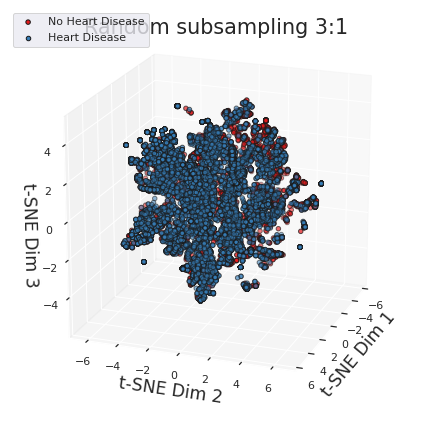

In [35]:
# 3-Dimensional plot of the datapoints computed using t-SNE
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],color=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='No Heart Disease')
ax.scatter(0,0,0,color=cin,edgecolors='k',label='Heart Disease')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random subsampling 3:1",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('tSNE_RUS.png', dpi=100)

#### **Train-Test Data Split**

In [36]:
# x train and test data
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [37]:
# One-hot-encoding
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

In [38]:
# y train data for other models
y_train_org

array([0, 0, 0, ..., 1, 1, 1])

## **CONVOLUTIONAL NEURAL NETWORK (CNN)**

#### **BRIEF OVERVIEW OF CNN**

***Note: Running the part above is MANDATORY for training any Network below***

CNN is a neural network that consists of a set of layers, the most important of which is a convolutional layer. This neural network compresses a fully connected network by reducing the number of connections, decreasing the number of shared weights on the edges, and pooling (downsampling) the data to further reduce the complexity.
CNN primarily comprises four types of layers:
- Convolutional Layer: This is the layer where the convolution process takes place. Convolution is the simple application of a filter (kernel) to an input, resulting in its activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input.
- Activation Layer: The activation layer utilizes an activation function that replaces every negative value in the output volume from the convolution layer with zero to prevent the values from summing up to zero. An example of an activation function is Rectified Linear Unit (ReLU).
- Pooling Layer: This layer is added between two convolution layers to reduce the data's spatial size. Max pooling and Average pooling are the two types of pooling. Max pooling takes the maximum value of the inputs in the kernel and outputs that value to the next layer, while Average pooling uses the average value of the inputs and outputs the reduced value to the next layer.
- Fully Connected Layer: This layer consists of a regular, fully connected neural network. The flattened final feature representation of the previous layers is fed to this layer for classification purposes.

#### **PROJECT CNN ARCHITECTURE**

***Input --> Dense --> Convolution Layer (2 filters) --> Convolution Layer (4 filters) --> Dense Layers (2) --> Softmax Layer***

The input is a 1D numerical array corresponding to all the factors/variables from LASSO-Majority Voting preprocessing stage.

The Dense layer after the input combines all the factors, and each neuron at the output of this dense layer is a weighted combination of all the variables, suggesting a homogenous mix of different variable types.

The following two Dense layers can be retrained for transfer learning should new data be obtained.

The softmax layer is the activation function in the output layer.

See presentation slide 17 for a diagrammatic representation of this architecture.

#### **CNN MODEL (SAMPLE)**

**Input => Dense(64) => Conv(2) => Dense (128) = Conv(4) => Dense (2)**

This sample is used to test and refine a small sample of the dataset to make testing faster.

In [39]:
# CNN model
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FL0 = keras.layers.Flatten()(Pool1)

AA1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(FL0)
BB1 = keras.layers.BatchNormalization(axis=-1)(AA1)
CC1 = keras.layers.Activation('relu')(BB1)
Pool2 = keras.layers.Dropout(0.2)(CC1)


RS2    = keras.layers.Reshape((128,1))(Pool2)
FC2    = keras.layers.Conv1D(4,5,strides=1)(RS2)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC2)



FL1    = keras.layers.Flatten()(Pool3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNNModel = keras.Model(inputs=inputs,outputs=outputs)
myCNNModel.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNNModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 103, 1)]          0         
                                                                 
 reshape (Reshape)           (None, 103)               0         
                                                                 
 dense (Dense)               (None, 64)                6656      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                             

In [40]:
# Assign weight and run CNN model with 10 epochs
class_weight = {0: 1, 1: 1}

myCNNModel.fit(x_train,y_train,epochs=50,verbose=1, class_weight=class_weight)

Epoch 1/50
875/875 [==============================] - 9s 8ms/step - loss: 0.5500 - accuracy: 0.7251
Epoch 2/50
875/875 [==============================] - 7s 8ms/step - loss: 0.5131 - accuracy: 0.7521
Epoch 3/50
875/875 [==============================] - 7s 8ms/step - loss: 0.5042 - accuracy: 0.7571
Epoch 4/50
875/875 [==============================] - 7s 8ms/step - loss: 0.5004 - accuracy: 0.7586
Epoch 5/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4989 - accuracy: 0.7628
Epoch 6/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4978 - accuracy: 0.7642
Epoch 7/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4932 - accuracy: 0.7659
Epoch 8/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4905 - accuracy: 0.7659
Epoch 9/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4909 - accuracy: 0.7685
Epoch 10/50
875/875 [==============================] - 7s 8ms/step - loss: 0.4884 - accuracy: 0.7664

In [41]:
# Test CNN model
test_loss,test_acc = myCNNModel.evaluate(x_test,y_test)
print(test_acc)

17402/17402 [==============================] - 59s 3ms/step - loss: 0.4980 - accuracy: 0.7647
0.7646971344947815


In [42]:
# Compute confusion matrix and metrics of model performance
from sklearn import metrics
from sklearn.metrics import classification_report
predlabel = myCNNModel.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)
confMat = classification_report(np.argmax(y_test,axis=1),f, labels=[1, 0])
print('CNN Classification report: \n', confMat)

[[201906  76516]
 [ 54511 223911]]
CNN Classification report: 
               precision    recall  f1-score   support

           1       0.75      0.80      0.77    278422
           0       0.79      0.73      0.76    278422

    accuracy                           0.76    556844
   macro avg       0.77      0.76      0.76    556844
weighted avg       0.77      0.76      0.76    556844



#### **CNN MODEL (TRAINING = 80%, TEST = 20% OF DATA)**

**The following section shows the result when 80% of data is used for training**

The class weights was changed and the epoch reduced to 1 because it was observed that higher epochs did not result in substantial increase in accuracy.

In [43]:
# With train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_data, hp_label, test_size = 0.2, random_state = 24)

In [44]:
# Standardize train and test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [45]:
# one-hot-encoding
Y_train = keras.utils.to_categorical(Y_train,2)
Y_test  = keras.utils.to_categorical(Y_test,2)

In [46]:
# CNN (80:20) model
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FL0 = keras.layers.Flatten()(Pool1)

AA1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(FL0)
BB1 = keras.layers.BatchNormalization(axis=-1)(AA1)
CC1 = keras.layers.Activation('relu')(BB1)
Pool2 = keras.layers.Dropout(0.2)(CC1)


RS2    = keras.layers.Reshape((128,1))(Pool2)
FC2    = keras.layers.Conv1D(4,5,strides=1)(RS2)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC2)



FL1    = keras.layers.Flatten()(Pool3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNNModelCopy = keras.Model(inputs=inputs,outputs=outputs)
myCNNModelCopy.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNNModelCopy.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 103, 1)]          0         
                                                                 
 reshape_3 (Reshape)         (None, 103)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                6656      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                           

In [47]:
np.where(Y_train==0)[0].shape
np.where(Y_train==1)[0].shape


(467875,)

In [48]:
# Class weight, epoch, and batch size is set according to data size
class_weight = {0: 1, 1: 1}

myCNNModelCopy.fit(X_train,Y_train,epochs=50,batch_size=1200,verbose=1, class_weight=class_weight)

Epoch 1/50
390/390 [==============================] - 45s 111ms/step - loss: 0.5196 - accuracy: 0.7483
Epoch 2/50
390/390 [==============================] - 39s 99ms/step - loss: 0.4908 - accuracy: 0.7668
Epoch 3/50
390/390 [==============================] - 39s 100ms/step - loss: 0.4866 - accuracy: 0.7690
Epoch 4/50
390/390 [==============================] - 40s 102ms/step - loss: 0.4841 - accuracy: 0.7706
Epoch 5/50
390/390 [==============================] - 39s 100ms/step - loss: 0.4823 - accuracy: 0.7714
Epoch 6/50
390/390 [==============================] - 38s 97ms/step - loss: 0.4803 - accuracy: 0.7727
Epoch 7/50
390/390 [==============================] - 38s 97ms/step - loss: 0.4792 - accuracy: 0.7731
Epoch 8/50
390/390 [==============================] - 38s 97ms/step - loss: 0.4782 - accuracy: 0.7735
Epoch 9/50
390/390 [==============================] - 38s 96ms/step - loss: 0.4761 - accuracy: 0.7746
Epoch 10/50
390/390 [==============================] - 38s 97ms/step - loss: 0

In [49]:
# Test model
test_loss,test_acc = myCNNModelCopy.evaluate(X_test,Y_test)
print(test_acc)

3656/3656 [==============================] - 12s 3ms/step - loss: 0.4698 - accuracy: 0.7894
0.7894228100776672


In [50]:
# Compute confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report
predlabel = myCNNModelCopy.predict(X_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(Y_test,axis=1),f)
print(confMat)
confMat = classification_report(np.argmax(Y_test,axis=1),f, labels=[1, 0])
print('CNN (70:30) Classification report: \n', confMat)

[[40248 18242]
 [ 6389 52090]]
CNN (70:30) Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.89      0.81     58479
           0       0.86      0.69      0.77     58490

    accuracy                           0.79    116969
   macro avg       0.80      0.79      0.79    116969
weighted avg       0.80      0.79      0.79    116969



## **OTHER MODELS**

##### **SUPORT VECTOR MACHINE (SVM)**

**This section runs SVM on the data set**

In [51]:
# SVM on data set
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

svcCAD = SVC(C= 0.05, gamma=1/41, kernel='rbf', class_weight='balanced')
svcCAD.fit(x_train_org,y_train_org)
predlabel = svcCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)
confMat = classification_report(y_test_org,predlabel, labels=[1, 0])
print('SVM Classification report: \n', confMat)

[[188313  90109]
 [ 47863 230559]]
SVM Classification report: 
               precision    recall  f1-score   support

           1       0.72      0.83      0.77    278422
           0       0.80      0.68      0.73    278422

    accuracy                           0.75    556844
   macro avg       0.76      0.75      0.75    556844
weighted avg       0.76      0.75      0.75    556844



##### **RANDOM FOREST AND ADABOOST**

**This section runs RandomForest and Adaboost on the data set**

In [52]:
# Train and test AdaBoost model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
class_weight = {0: 1, 1: 3}
adaboostCAD = AdaBoostClassifier(n_estimators=1000, random_state=0)
adaboostCAD.fit(x_train_org,y_train_org)
predlabel = adaboostCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)
confMat = classification_report(y_test_org,predlabel, labels=[1, 0])
print('AdaBoost Classification report: \n', confMat)

[[208443  69979]
 [ 61993 216429]]
AdaBoost Classification report: 
               precision    recall  f1-score   support

           1       0.76      0.78      0.77    278422
           0       0.77      0.75      0.76    278422

    accuracy                           0.76    556844
   macro avg       0.76      0.76      0.76    556844
weighted avg       0.76      0.76      0.76    556844



In [53]:
# Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': (10,30,50,100,130,160,200), 'max_depth': (2, 3)}
randomforestCAD = GridSearchCV(RandomForestClassifier(random_state=0, class_weight='balanced_subsample'),
                               parameters, cv=5)


randomforestCAD.fit(x_train_org,y_train_org)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=0),
             param_grid={'max_depth': (2, 3),
                         'n_estimators': (10, 30, 50, 100, 130, 160, 200)})

In [54]:
# Print results for RandomForest cross-validation and best estimatores in the dataset
print(randomforestCAD.cv_results_)
print(randomforestCAD.best_estimator_)

{'mean_fit_time': array([0.15592222, 0.4003334 , 0.64478927, 1.29245877, 1.66889462,
       2.06715798, 2.5530632 , 0.16149426, 0.44781313, 0.7400351 ,
       1.46302719, 1.89585438, 2.34236422, 2.92131639]), 'std_fit_time': array([0.00992144, 0.00712278, 0.00307755, 0.01848838, 0.0161273 ,
       0.01227008, 0.01848167, 0.00495058, 0.00724014, 0.01142069,
       0.00918259, 0.01105963, 0.01584103, 0.01155942]), 'mean_score_time': array([0.00817657, 0.017834  , 0.0292737 , 0.05449872, 0.06866078,
       0.08122067, 0.10212226, 0.00870419, 0.01913586, 0.03083372,
       0.05528731, 0.07237358, 0.0882359 , 0.10925784]), 'std_score_time': array([0.00021398, 0.0004059 , 0.00284569, 0.00382961, 0.00213322,
       0.0006051 , 0.00352396, 0.00017523, 0.00012012, 0.00275851,
       0.00048289, 0.00202374, 0.0019304 , 0.00160964]), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
             mask=[False, False, False, False, False, False, False, False,
         

In [55]:
# Test RandomForest model
randomforestCADopt = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

randomforestCADopt.fit(x_train_org,y_train_org)
predlabel = randomforestCADopt.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)
confMat = classification_report(y_test_org,predlabel, labels=[1, 0])
print('RandomForest Classification report: \n', confMat)



[[219176  59246]
 [107609 170813]]
RandomForest Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.61      0.67    278422
           0       0.67      0.79      0.72    278422

    accuracy                           0.70    556844
   macro avg       0.71      0.70      0.70    556844
weighted avg       0.71      0.70      0.70    556844



##### **LOGISTIC REGRESSION**

**This sector runs logistic regression on the data set**

In [56]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs',max_iter=100000, 
                           class_weight= {0:1, 1:3.0}, verbose=1, random_state = 2)
model = clf.fit(x_train_org,y_train_org)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [57]:
# Compute confusion matrix
predlabel = model.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)

In [58]:
# Print performance scores
print(confMat)
confMat = classification_report(y_test_org,predlabel, labels=[1, 0])
print('Logistic Regression Classification report: \n', confMat)

[[138111 140311]
 [ 16019 262403]]
Logistic Regression Classification report: 
               precision    recall  f1-score   support

           1       0.65      0.94      0.77    278422
           0       0.90      0.50      0.64    278422

    accuracy                           0.72    556844
   macro avg       0.77      0.72      0.70    556844
weighted avg       0.77      0.72      0.70    556844



## **RESULTS**

**Below are the performance measures used for this project**

#### **PRECISION**

The precision of a model returns the proportion of true positives among all the values predicted as positive. The formula is given as:

                        TP/(TP + FP)



The gragh above shows that SVM had the best precision of all the models, followed by RandomForest. The CNN model and Logistic Regression models are tied at third.

#### **RECALL**


The recall of a model returns the proportion of positive values correctly predicted. The formula is given as:

                        TP/(TP + FN)

The gragh above shows that AdaBoost had the best precision of all the models, followed closely by both CNN models. The recall value for RandomForest is the lowest at below 85%.

#### **F1**


F1 represents the harmonic mean of precision and recall. It is very good for comparing classifiers. The formula is given as:

                       (2 * Precision)/(Precision + Recall)



All models did closely well in the F1 scores, except RandomForest which had a F1 score of about 88%.

#### **ACCURACY**


Accuracy returns the proportion of correct predictions. The formula is given as:

                       (TP + TN)/(TP + TN + FP + FN)



AdaBoost and the CNN models again lead the way when it comes to accuracy. RandomForest shows accuracy of about 80% while the SVM model had the poorest accuracy at below 70%.

## **CONCLUSION**

As the results shows, the simple CNN model implemented in this report performed very well when compared against some of the best machine learning models. Even better, its performance measures were more consistent across multiple performance measures unlike other models that performed selectively well.

Multiple combinations of features were dropped in an attempt to improve the model but led to decline in performance measures. Also, a plethora of various class weights was used also but lead to similar decline in performance.

Future work on this project may include using a different technique of dimensionality reduction to see if the models perform better. Furthermore, other features that were discarded during cleaning of the data may be reconsidered in the hopes of improving performance. Also, other networks can be utilized to compare against the results of CNN.

## **REFERENCES**



2020 BRFSS Codebook CDC. https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf

2020 Survey Questions. https://www.cdc.gov/brfss/questionnaires/pdf-ques/2020-BRFSS-Questionnaire-508.pdf

Ahmed, M. A., Yasmeen, A. A., Awadalla, H., Elmadhoun, W. M., Noor, S. K., & Almobarak,
A. O. (2017). Prevalence and trends of obesity among adult Sudanese individuals: Population
based study. Diabetes & Metabolic Syndrome: Clinical Research & Reviews, 11(2), 963- 967.
https://doi.org/10.1016/j.dsx.2017.07.023

Behavioral Risk Factor Surveillance System (BRFSS) Overview, 2020. https://www.cdc.gov/brfss/annual_data/2020/pdf/overview-2020-508.pdf

Know Your Risk for Heart Disease | cdc.gov. https://www.cdc.gov/heartdisease/risk_factors.htm

Dutta, Aniruddha, et al. "An efficient convolutional neural network for coronary heart disease prediction." Expert Systems with Applications 159 (2020): 113408. https://github.com/anik-UCB/CNN-CardioPrediction

Remington PL, Smith MY, Williamson DF, Anda RF, Gentry EM, Hogelin GC. Design, characteristics, and usefulness of state-based behavioral risk factor surveillance: 1981-87. Public Health Rep. 1988;103(4):366-375.

